<a href="https://colab.research.google.com/github/alemakefwa/alem/blob/main/ROC_curve_(Unassisted_childBirth_SSA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning in Python: Making Receiver Operating Characteristic (ROC) curve**


<i>pooled prevalence and machine learning predictions of unassisted childbirth in SSA </i>

In this Jupyter notebook, we will be making a Receiver Operating Characteristic (ROC) curve using UNassisted childbirth SSA data set.
#*** Alemakef wagnew Melesse**

## **What is ROC curve?**

The **ROC curve** summarizes the prediction performance of a classification model at all classification thresholds. Particularly, the ROC curve plots the **False Positive Rate (FPR)** on the *X-axis* and the **True Positive Rate (TPR)** on the *Y-axis*.

$\text{TPR (Sensitivity)} = \frac{TP}{TP + FN}$

$\text{FPR (1 - Specificity)} = \frac{FP}{TN + FP}$





## **import Unassisted childbirth SSA data set **

In [29]:
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd


In [30]:
unass=pd.read_csv('/content/SSAunasisted.csv')

In [31]:
unasisted=pd.DataFrame(unass)

In [32]:
unasisted.head()

,residence,birth_interval,wanted_Lachild,matherage,wealth,family_size,maternal_education,husband_education,maternal_occupation,age_firstbirth,...,water_source,media_exposure,anc,mar,distance_to_health_fasility,Getting_money,permission,not_wanting_alone,country1,unass
0,rural,no,wanted then,>34,poor,6-13,no formal education,no formal education,working,17 and less than,...,unimproved,not exposed,no visit,married/inunion,big problem,big problem,not beig problem,not beig problem,Angola,yes
1,rural,no,wanted then,>34,poor,6-13,no formal education,primary,working,more than 20,...,unimproved,not exposed,no visit,married/inunion,not beig problem,not beig problem,not beig problem,not beig problem,Angola,yes
2,rural,no,wanted then,15-19,poor,6-13,no formal education,no formal education,working,17 and less than,...,unimproved,not exposed,no visit,single,not beig problem,big problem,big problem,not beig problem,Angola,yes
3,rural,no,wanted then,>34,poor,6-13,primary,primary,working,more than 20,...,unimproved,not exposed,no visit,married/inunion,not beig problem,big problem,big problem,not beig problem,Angola,yes
4,rural,no,wanted then,25-29,poor,6-13,no formal education,no formal education,working,17 and less than,...,unimproved,not exposed,no visit,married/inunion,not beig problem,not beig problem,not beig problem,not beig problem,Angola,yes


In [33]:
unasisted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45841 entries, 0 to 45840
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   residence                    45841 non-null  object
 1   birth_interval               45841 non-null  object
 2   wanted_Lachild               45841 non-null  object
 3   matherage                    45841 non-null  object
 4   wealth                       45841 non-null  object
 5   family_size                  45841 non-null  object
 6   maternal_education           45841 non-null  object
 7   husband_education            45841 non-null  object
 8   maternal_occupation          45841 non-null  object
 9   age_firstbirth               45841 non-null  object
 10  bord                         45840 non-null  object
 11  desire                       45840 non-null  object
 12  water_source                 45840 non-null  object
 13  media_exposure               45

In [21]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
unasisted.shape

(18405, 22)

In [26]:
# Converting binary Nominal Variable unassisted childbirth to numeric
unasisted['unass'].replace({'yes':1, 'no':0}, inplace=True)
print(unasisted)

# Converting multiclass Nominal Variable Department to numeric
# by generating dummy variables
unasisted=pd.get_dummies(unasisted)
print(unasisted)

<ipython-input-26-71f06157a82b>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  unasisted['unass'].replace({'yes':1, 'no':0}, inplace=True)
<ipython-input-26-71f06157a82b>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  unasisted['unass'].replace({'yes':1, 'no':0}, inplace=True)


       residence birth_interval wanted_Lachild matherage wealth  family_size  \
0          rural             no    wanted then       >34   poor         6-13   
1          rural             no    wanted then       >34   poor         6-13   
2          rural             no    wanted then     15-19   poor         6-13   
3          rural             no    wanted then       >34   poor         6-13   
4          rural             no    wanted then     25-29   poor         6-13   
...          ...            ...            ...       ...    ...          ...   
185996     urban             no   wanted later       >34   rich  less than 6   
185997     urban             no   wanted later     25-29   rich  less than 6   
185998     urban             no    wanted then     20-24   rich  less than 6   
185999     urban             no   wanted later     30-34   rich  less than 6   
186000     urban             no    wanted then     25-29   rich  less than 6   

         maternal_education      husban

In [27]:
unassisted=unasisted['unass'].unique()
unassisted

array([1, 0])

In [28]:
#class distribution
unasisted['unass'].value_counts()

,count
unass,
0,125747
1,60254


### **Data preprocesing**
This is done to put the data in an appropriate format before modelling

In [30]:
X=unasisted.drop(labels=['unass'], axis=1)
Y=unasisted['unass'].values

In [31]:
from sklearn.preprocessing import OneHotEncoder

In [32]:
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns.tolist()
unassencoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = unassencoder.fit_transform(unasisted[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=unassencoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
unass_encoded = pd.concat([unasisted, one_hot_df], axis=1)

# Drop the original categorical columns
unass_encoded = unass_encoded.drop(categorical_columns, axis=1)
print(f"unassisted childbirth SSA: \n{unass_encoded}")

unassisted childbirth SSA: 
        unass  residence_rural  residence_urban  birth_interval_no  \
0           1             True            False               True   
1           1             True            False               True   
2           1             True            False               True   
3           1             True            False               True   
4           1             True            False               True   
...       ...              ...              ...                ...   
185996      0            False             True               True   
185997      0            False             True               True   
185998      0            False             True               True   
185999      0            False             True               True   
186000      0            False             True               True   

        birth_interval_yes  wanted_Lachild_wanted later  \
0                    False                        False   
1            

In [33]:
unass_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186001 entries, 0 to 186000
Data columns (total 80 columns):
 #   Column                                        Non-Null Count   Dtype
---  ------                                        --------------   -----
 0   unass                                         186001 non-null  int64
 1   residence_rural                               186001 non-null  bool 
 2   residence_urban                               186001 non-null  bool 
 3   birth_interval_no                             186001 non-null  bool 
 4   birth_interval_yes                            186001 non-null  bool 
 5   wanted_Lachild_wanted later                   186001 non-null  bool 
 6   wanted_Lachild_wanted no more                 186001 non-null  bool 
 7   wanted_Lachild_wanted then                    186001 non-null  bool 
 8   matherage_15-19                               186001 non-null  bool 
 9   matherage_20-24                               186001 non-null  bool 
 

In [34]:
unass_encoded.shape

(186001, 80)

## **Data splitting**

In [35]:
from sklearn.model_selection import train_test_split

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2,
                                                    random_state=0)

## **Build classification model**

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, f1_score, recall_score

# Define the classifiers to evaluate
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),  # Enable probability estimates
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),  # Suppress warnings
    'AdaBoost': AdaBoostClassifier()
}

# Initialize a list to store the results
results_list = []

# Evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, Y_train)

    # Make predictions
    y_pred = clf.predict(X_test)
    y_pred_proba = clf.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

    # Calculate metrics
    roc_auc = roc_auc_score(Y_test, y_pred_proba)
    f1 = f1_score(Y_test, y_pred)
    recall = recall_score(Y_test, y_pred)

    # Append results to the list
    results_list.append({'Classifier': name, 'ROC AUC': roc_auc, 'F1 Score': f1, 'Recall': recall})

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

# Print the results
print(results)

NameError: name 'X_train' is not defined

### imbalanced data

In [ ]:
classifiers = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Decision Tree': DecisionTreeClassifier(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'Support Vector Machine': SVC(probability=True, class_weight='balanced'),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', scale_pos_weight=1),  # Adjust as needed
    'AdaBoost': AdaBoostClassifier()
}

In [ ]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, Y_train)

# Update the fitting line:
clf.fit(X_train_resampled, y_train_resampled)

In [51]:
rf = RandomForestClassifier(max_features=18, n_estimators=2000)
rf.fit(X_train, Y_train)

RandomForestClassifier(max_features=18, n_estimators=2000)

### Naive Bayes

In [52]:
nb = GaussianNB()
nb.fit(X_train, Y_train)

GaussianNB()

## **Prediction probabilities** $^2$

In [53]:
r_probs = [0 for _ in range(len(Y_test))]
rf_probs = rf.predict_proba(X_test)
nb_probs = nb.predict_proba(X_test)

Probabilities for the positive outcome is kept.

In [54]:
rf_probs = rf_probs[:, 1]
nb_probs = nb_probs[:, 1]

## **Computing AUROC and ROC curve values**

In [55]:
from sklearn.metrics import roc_curve, roc_auc_score

### **Calculate AUROC**
**ROC** is the receiver operating characteristic
**AUROC** is the area under the ROC curve

In [56]:
r_auc = roc_auc_score(Y_test, r_probs)
rf_auc = roc_auc_score(Y_test, rf_probs)
nb_auc = roc_auc_score(Y_test, nb_probs)

### **Print AUROC scores**

In [58]:
print('Random (chance) Prediction: AUROC = %.3f' % (r_auc))
print('Random Forest: AUROC = %.3f' % (rf_auc))
print('Naive Bayes: AUROC = %.3f' % (nb_auc))

Random (chance) Prediction: AUROC = 0.500
Random Forest: AUROC = 1.000
Naive Bayes: AUROC = 1.000


### **Calculate ROC curve**

In [59]:
r_fpr, r_tpr, _ = roc_curve(Y_test, r_probs)
rf_fpr, rf_tpr, _ = roc_curve(Y_test, rf_probs)
nb_fpr, nb_tpr, _ = roc_curve(Y_test, nb_probs)

## **Plot the ROC curve**

In [60]:
import matplotlib.pyplot as plt

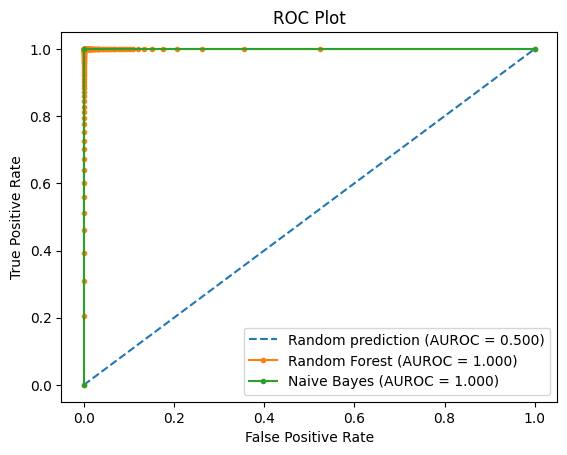

In [61]:

plt.plot(r_fpr, r_tpr, linestyle='--', label='Random prediction (AUROC = %0.3f)' % r_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest (AUROC = %0.3f)' % rf_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='Naive Bayes (AUROC = %0.3f)' % nb_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() #
# Show plot
plt.show()

## **Reference**
1. https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html
2. https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/


---